1) Exploratory Data Analysis 
2) Representation of graphs for given data
3) Logistic Regression 


In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading test & train data files

testFile = pd.read_csv("C:/Users/Grapes/Downloads/test.csv")
trainFile = pd.read_csv("C:/Users/Grapes/Downloads/train.csv")




In [3]:
#checking the columns available in test & train data

print("test file datatypes:\n",testFile.dtypes)
print("\n")
print("train file datatypes:\n",trainFile.dtypes)


test file datatypes:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


train file datatypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
trainFile.head(10)  #accessing top 10 data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print("train data shape",trainFile.shape)#gives no. of records/data
print("test data shape",testFile.shape)

train data shape (891, 12)
test data shape (418, 11)


In [6]:
trainFile.describe() #stat about train data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
trainFile.isnull().sum()  #to check the count  null values in data for each columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

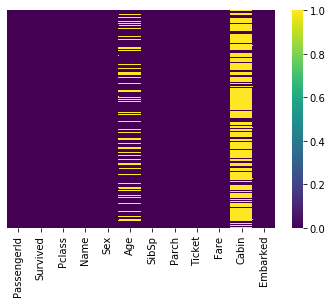

In [8]:
#visualise the null using seaborn heatmap()

sns.heatmap(trainFile.isnull(),yticklabels=False,cmap='viridis')

#shows the age and cabin column contains nan values

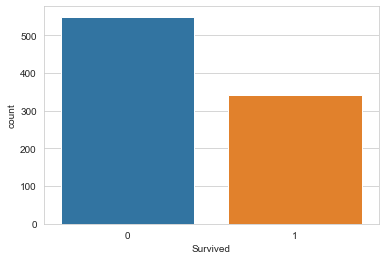

In [9]:
#using seaborn visualising the survived 

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=trainFile)

# 0--> not survived
# 1--> survived

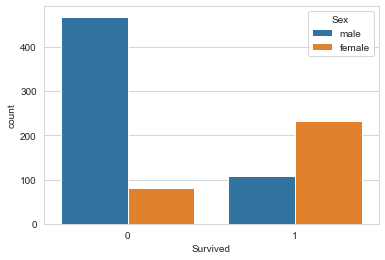

In [10]:
#visualising survived based on sex  
#i) sex v/s survived

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=trainFile)

#the female survived is more 

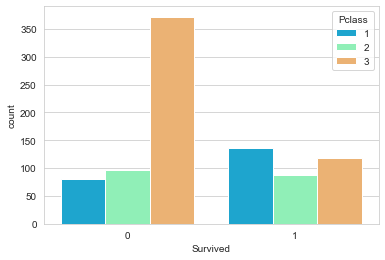

In [11]:
#visualising survived based on Pclass(Passanger_class)
#ii) pclass v/s survived

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=trainFile,palette='rainbow')

#most the people not survived who obtained pclass 3

In [12]:
trainFile.corr() #checking the correlation among the fields

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


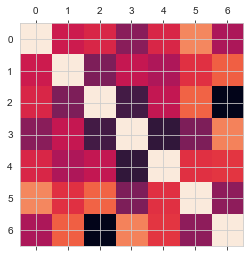

In [13]:
plt.matshow(trainFile.head(10).corr()) #visualising the corelation of top 10 records
plt.show()

In [14]:
trainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


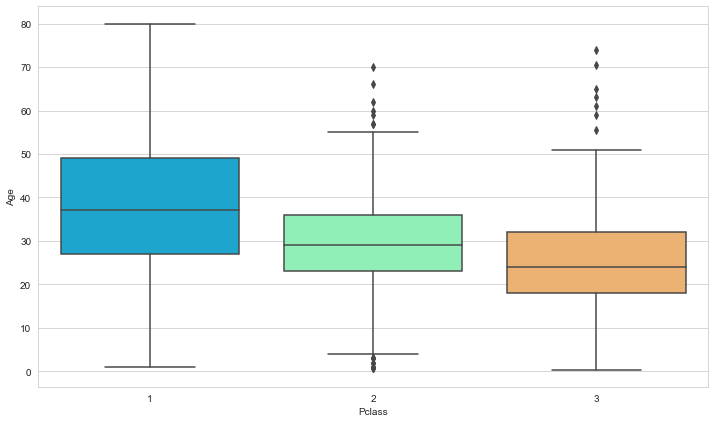

In [15]:
#Data cleaning 

#before cleaning the data or replacing isnull value will check the data to replace the value with pclass column for age

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=trainFile,palette='rainbow')

In [16]:
#method to replace null values in age column by observing the boxplot value 


def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        
        if(Pclass == 1):
            return 38
        
        elif(Pclass == 2):
            return 30
        
        else:
            return 23
    else:
        return Age

In [17]:
trainFile['Age'] = trainFile[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
### converting categorical data to numerical values using getdummies()


trainFile.info()

#to check which all categorical data to convert

# 1) will consider major sex and embarked because sex belongs to male or female and embarked belongs to S,C and Q

# will convert categorical to numerical now using getdummies()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
#assining new column names for sex and embark after making these columns as numerical

sex = pd.get_dummies(trainFile['Sex'],drop_first=True)
embark = pd.get_dummies(trainFile['Embarked'],drop_first=True).head()

In [20]:
trainFile.drop(['Sex'],axis=1,inplace=True)
trainFile.drop(['Embarked'],axis=1,inplace=True)

In [21]:
trainFile=pd.concat([trainFile,sex,embark],axis=1)

In [80]:
trainFile.head()  # New columns male and Q,S is added for sex & embark added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


i) Logistic Regression
ii) Showing the survival column output in csv file


In [ ]:
#logistic regression implementation for dependent and independent features
#i) Survived is dependent column and all others are inpendent columns



In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [101]:
#importing test and train data set files

testFile_1 = pd.read_csv("C:/Users/Grapes/Downloads/test.csv")
trainFile_1 = pd.read_csv("C:/Users/Grapes/Downloads/train.csv")

In [102]:
#converting categorical variables to numerical variables using getdummies


train_data = pd.get_dummies(trainFile_1, columns = ['Sex', 'Embarked'],drop_first = True)
test_data = pd.get_dummies(testFile_1, columns = ['Sex', 'Embarked'],drop_first = True)

In [103]:
train_data.head(10)

#after getdummies Sex and Embarked changed to numerical variable

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


In [104]:
test_data.head(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,1,0,1
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,0,0,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,1,0,1


In [105]:
#considering the only selected columns

train_data_sel = train_data.loc[:, ['Survived','Pclass','Sex_male','Fare','Embarked_Q','Embarked_S']]
test_data_sel = test_data.loc[:, ['Pclass','Sex_male','Fare','Embarked_Q','Embarked_S']]   #in test data no survived column

In [107]:
#splitting the test and train data values

X_train = train_data_sel.iloc[:, 1:]       #excluding survived column
y_train = train_data_sel.iloc[:, [0]]       # we are predicting the survival so y_train is assigned to survived column


X_test = test_data_sel     #consdering the all test data for predicting the model for training the data



In [122]:
test_data.isnull().values.any()
null_columns=test_data.columns[test_data.isnull().any()]
print(null_columns)

null_columns_sum=test_data.isnull().sum()
print(null_columns_sum)

print("*************************")
tets_data_na_filled = test_data.fillna(test_data.mean())
print(tets_data_na_filled.isnull().sum())

Index(['Age', 'Fare', 'Cabin'], dtype='object')
PassengerId      0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64
*************************
PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [126]:
# X_test.isnull().sum()

X_test.fillna(method = 'ffill',inplace=True)
X_test.isnull().sum()

Pclass        0
Sex_male      0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [127]:
genderRes = X_test['Sex_male'] # gender wise predictinng for survival

In [128]:
passengerId = test_data['PassengerId']

In [129]:
# training and predicting the values using logistic regression

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train,y_train)

y_pred = logistic_reg.predict(X_test)  

C:\Users\Grapes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grapes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
#checking the Score for train values
logistic_reg.score(X_train, y_train)

0.7833894500561167

In [131]:
# naming convention for gender 
# 1 --> male
# 0 --> female


genderName = []
for i in genderRes:
#     print(i)
    if(i == 1):
        genderName.append('Male')
    else:
        genderName.append('Female')

In [133]:
#Creating the dataframe of prediction & gender

df = pd.DataFrame({'Gender':genderName,'Survived':y_pred})
df1 = pd.DataFrame({'PassengerId':passengerId,'Survived':y_pred})

In [134]:
df.info()  #dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
Gender      418 non-null object
Survived    418 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [135]:
df.head(10)

,Gender,Survived
0,Male,0
1,Female,1
2,Male,0
3,Male,0
4,Female,1
5,Male,0
6,Female,1
7,Male,0
8,Female,1
9,Male,0


In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [138]:
#write to the dataframe into csv file


output_csv = df.to_csv('EDA_LogiReg_Assignment_Output.csv', index = False)
output_csv_passengerID = df1.to_csv('EDA_LogiReg_Assignment_Output_PassengerID.csv', index = False)

